In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

kundenDf = pd.read_csv('data/kunden.csv', sep = ';')
besucherDf = pd.read_csv('data/besucher.csv', sep = ';')
kundeBundesland = pd.read_csv('data/geo.txt', sep = '\t')

# Die Analyse des Elektroauto-Marktes: Kundenpräferenzen, sozioökonomische Merkmale und Kaufmotivation bei Elektratuto AG

# Gliederung
- Erfolgsfaktoren und Marktanalyse CEO
- Kundenanalyse
- Statistische Analysen
- Regressionsanalysen
- Probleme
- Empfehlungen fuer die Zukunft

# Erfolgsfaktoren und Marktanalyse

In [53]:
anzahl_kunden = kundenDf['KundeNr'].count()
print(f'- Gesamtanzahl der verkauften Autos: {anzahl_kunden}')

preis = kundenDf['Preis']

max = round(preis.max(),2)
min = round(preis.min(),2)
mean = round(preis.mean(),2)

print(f'- Bei einem Hoechstpreis von = {max}€, Mindestpreis von = {min}€ und Durchschnittspreis von = {mean}€')

sum = preis.sum().round()

print(f'- Es ergibt sich ein Gesamtumsatz von {sum}€')

- Gesamtanzahl der verkauften Autos: 1104
- Bei einem Hoechstpreis von = 165482.31€, Mindestpreis von = 21471.65€ und Durchschnittspreis von = 88975.2€
- Es ergibt sich ein Gesamtumsatz von 98228619.0€


Regionale Marktdurchdringung

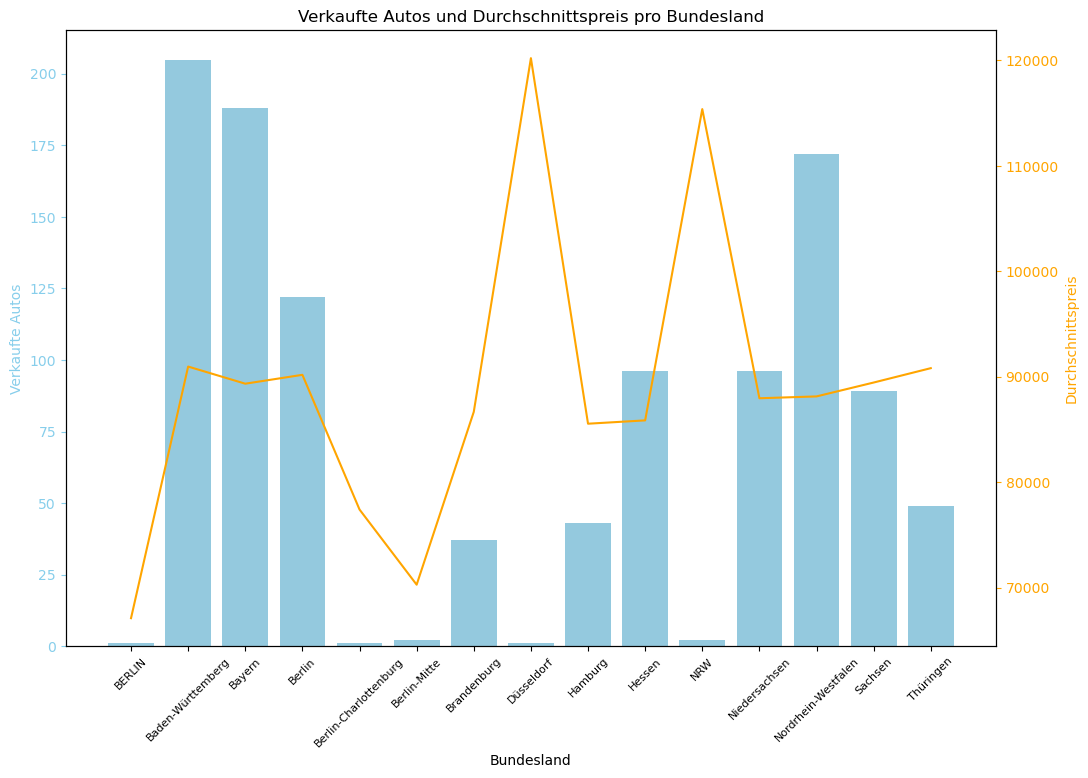

In [42]:
kundenDfMerged = pd.merge(kundenDf, kundeBundesland, on='KundeNr')

# Anzahl verkauften Autos
anzahl_autos_pro_bundesland = kundenDfMerged.groupby('Niederlassung')['KundeNr'].count().reset_index()
anzahl_autos_pro_bundesland.columns = ['Bundesland', 'VerkaufteAutos']

# durchschnittlichen Umsatzes
durchschnittsumsatz_pro_bundesland = kundenDfMerged.groupby('Niederlassung')['Preis'].mean().reset_index()
durchschnittsumsatz_pro_bundesland.columns = ['Bundesland', 'Durchschnittspreis']

ergebnisse_df = pd.merge(anzahl_autos_pro_bundesland, durchschnittsumsatz_pro_bundesland, on='Bundesland')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x='Bundesland', y='VerkaufteAutos', data=ergebnisse_df, ax=ax1, color='skyblue')
ax1.set_ylabel('Verkaufte Autos', color='skyblue')
ax1.tick_params('y', colors='skyblue')

ax1.tick_params(axis='x', rotation=45, labelsize=8)

ax2 = ax1.twinx()
sns.lineplot(x='Bundesland', y='Durchschnittspreis', data=ergebnisse_df, ax=ax2, color='orange')
ax2.set_ylabel('Durchschnittspreis', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Verkaufte Autos und Durchschnittspreis pro Bundesland')
plt.show()

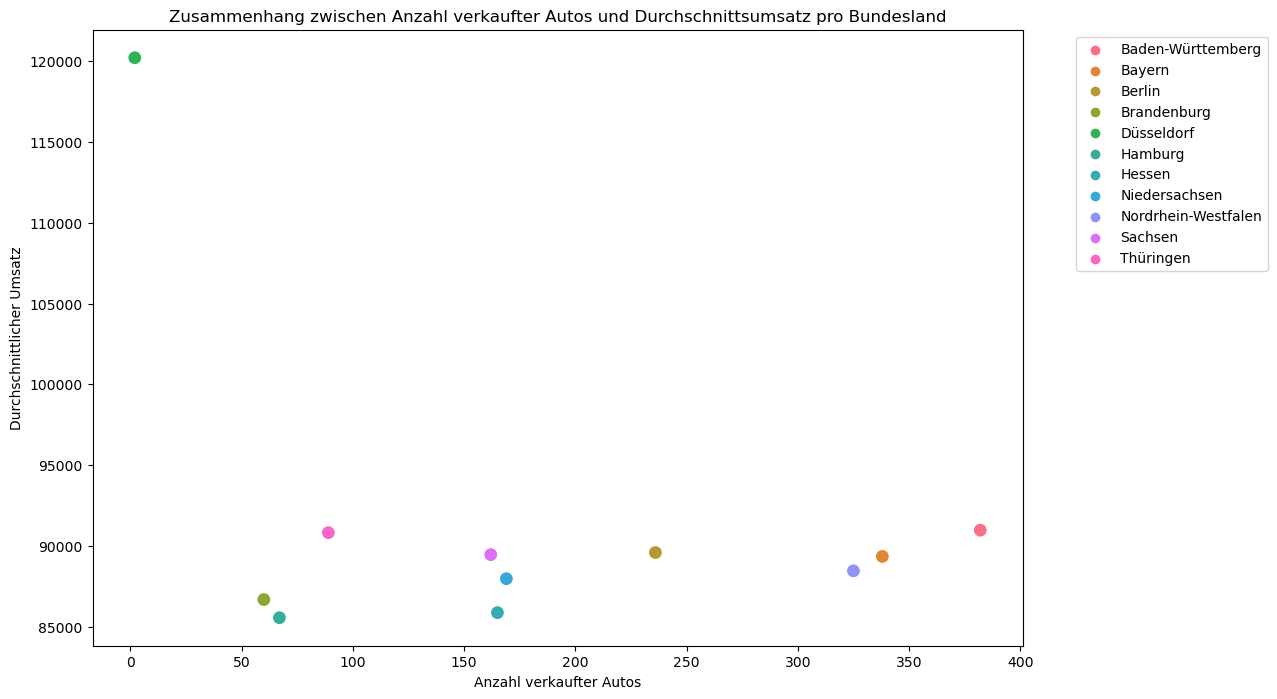

In [36]:
verkaufte_autos_pro_bundesland = {'Baden-Württemberg': 382, 'Bayern': 338, 'Berlin': 236, 'Brandenburg': 60,
                                  'Düsseldorf': 2, 'Hamburg': 67, 'Hessen': 165, 'Niedersachsen': 169,
                                  'Nordrhein-Westfalen': 325, 'Sachsen': 162, 'Thüringen': 89}

# Durchschnittlicher Umsatz pro Bundesland (aus vorherigen Ergebnissen)
durchschnittlicher_umsatz_pro_bundesland = {
    'Baden-Württemberg': 90969.56, 'Bayern': 89344.31, 'Berlin': 89584.98, 'Brandenburg': 86673.64,
    'Düsseldorf': 120215.50, 'Hamburg': 85549.50, 'Hessen': 85864.93, 'Niedersachsen': 87963.31,
    'Nordrhein-Westfalen': 88451.76, 'Sachsen': 89455.08, 'Thüringen': 90816.99
}

df = pd.DataFrame(list(verkaufte_autos_pro_bundesland.items()), columns=['Bundesland', 'VerkaufteAutos'])
df['DurchschnittlicherUmsatz'] = df['Bundesland'].map(durchschnittlicher_umsatz_pro_bundesland)

# Streudiagramm
plt.figure(figsize=(12, 8))
sns.scatterplot(x='VerkaufteAutos', y='DurchschnittlicherUmsatz', data=df, hue='Bundesland', s=100)
plt.title('Zusammenhang zwischen Anzahl verkaufter Autos und Durchschnittsumsatz pro Bundesland')
plt.xlabel('Anzahl verkaufter Autos')
plt.ylabel('Durchschnittlicher Umsatz')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Frage 14

# Kundenanalyse

Geschlechtsverteilung der Kunden

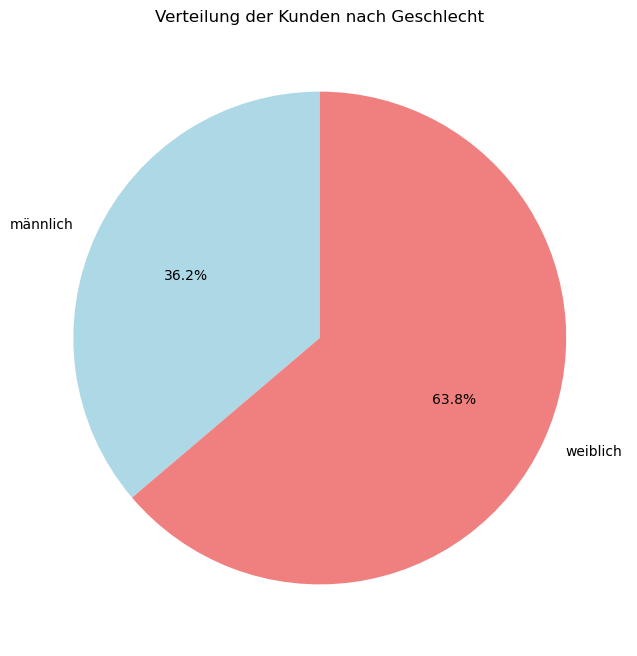

In [32]:
kundenDf['Geschlecht'] = kundenDf['Geschlecht'].replace({0: 'männlich', 1: 'weiblich'})

geschlechtsverteilung = kundenDf.groupby(by='Geschlecht').count()

plt.figure(figsize=(8, 8))
plt.pie(geschlechtsverteilung['KundeNr'], labels=geschlechtsverteilung.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Verteilung der Kunden nach Geschlecht')
plt.show()

Durchschnittsalter der Kunden

In [34]:
round(kundenDf['Alter'].mean())

50

Durchschnittsalter der Besucher in Showrooms

In [22]:
round(besucherDf['Alter'].mean())

50

Durchschnittsalter der maennlichen Kunden

In [31]:
kundenDf[kundenDf['Geschlecht'] == 'männlich'][['Geschlecht', 'Alter']].groupby(by='Geschlecht').mean().round()

,Alter
Geschlecht,
männlich,50.0


Durchschnittseinkommen der Kunden

In [24]:
einkommenMean = kundenDf['Einkommen'].mean().round()

print(f'Durchschnittseinkommen = {einkommenMean}€')

Durchschnittseinkommen = 964475.0€


# Statistische Analysen

Abhaengigkeit zwischen Alter, Einkommen, Preis und Zeit

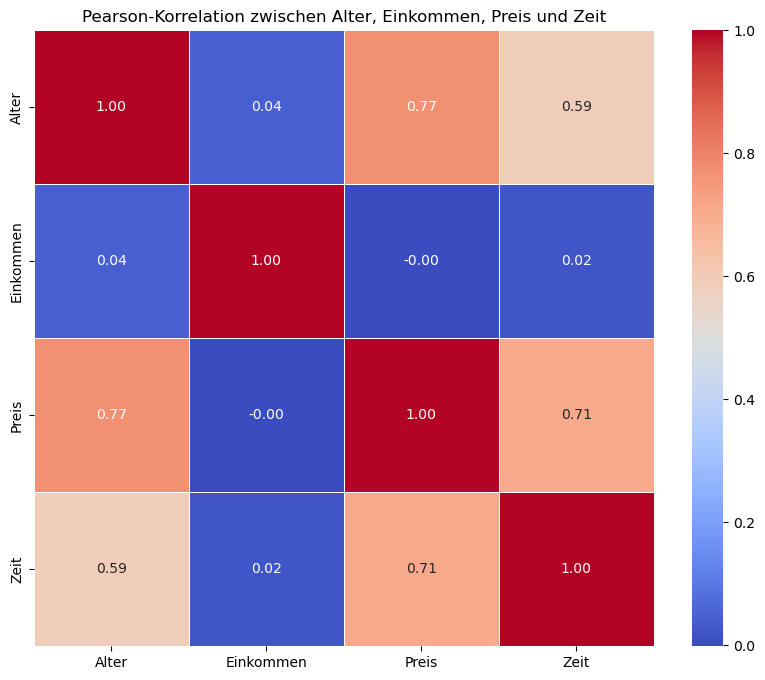

In [54]:
kundenDf_kunden = kundenDf.dropna(subset=['Alter', 'Einkommen', 'Preis', 'Zeit'])

kundenDf_kunden = kundenDf.dropna(subset=['Alter', 'Einkommen', 'Preis', 'Zeit'])

# Pearson-Korrelation
korrelation_matrix = kundenDf_kunden[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(korrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson-Korrelation zwischen Alter, Einkommen, Preis und Zeit')
plt.show()

Frage 12

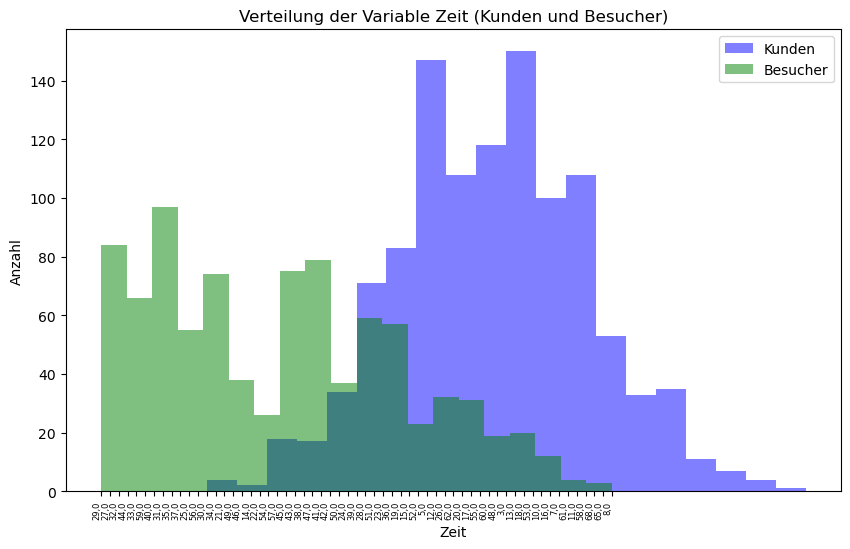

In [51]:
plt.figure(figsize=(10, 6))

# Kunden
plt.hist(kundenDf['Zeit'], bins=20, alpha=0.5, label='Kunden', color='blue')

# Besucher
plt.hist(besucherDf['Zeit'], bins=20, alpha=0.5, label='Besucher', color='green')

plt.xlabel('Zeit')
plt.ylabel('Anzahl')
plt.title('Verteilung der Variable Zeit (Kunden und Besucher)')
plt.legend()

plt.xticks(rotation=90, ha='right')
plt.tick_params(axis='x', labelsize=6)

plt.show()

# Frage 13

# Regressionsanalysen

# Frage 15

# Frage 16

# Frage 17

# Frage 18

# Probleme

# Frage 19

# Empfelungen fuer die Zukunft

# Frage 20

# Vielen Dank fuer eure Aufmerksamkeit